In [1]:
import pandas as pd
import numpy as np
import AD_utils
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importing train datatset

train_data = pd.read_csv('tests_dataset/Final_train_dataset.csv')
test_data = pd.read_csv('tests_dataset/Final_test_dataset.csv')

smiles_test = test_data['Canonical_SMILES'].to_list()
smiles_train = train_data['Canonical_SMILES'].to_list()
activity = test_data['Activity_outcome'].to_list()
train_data

,PUBCHEM_CID,Activity_outcome,Canonical_SMILES
0,49790754,1,CC1=C(C=CC(=C1)OC)C2=C3C=COC3=C(C=C2)C(=O)NCC4...
1,3580213,1,C1=C(C2=C(N=CN=C2N1C3C(C(C(O3)CO)O)O)N)C(=S)N
2,575908,0,C1=CC=C(C=C1)N2C(=NN=N2)SC3=C(C=C(C=C3)[N+](=O...
3,15055241,1,CC1(CC(=CC(=[N+]2CCCCC2)C1)N3CCCCC3)C.[I-]
4,373978,1,C1=C2C(=C(S1)C3C(C(C(O3)CO)O)O)N=CN=C2N
...,...,...,...
1467,42628600,1,CC1C(CC2CC(NC3=NCC1N23)C(C4=CC(=O)NC(=O)N4)O)O...
1468,327045,1,C1CCN(C1)CCN2C(=O)C3=CC=CC4=CC(=CC(=C43)C2=O)[...
1469,1307598,0,C1COCCN1CCNC2=C3C=NN(C3=NC=N2)C4=CC=C(C=C4)Cl
1470,44825859,1,C1C2=CN=NN2C3=CC=CC=C3C(N1CC4=CC(=CC(=C4)Cl)Cl...


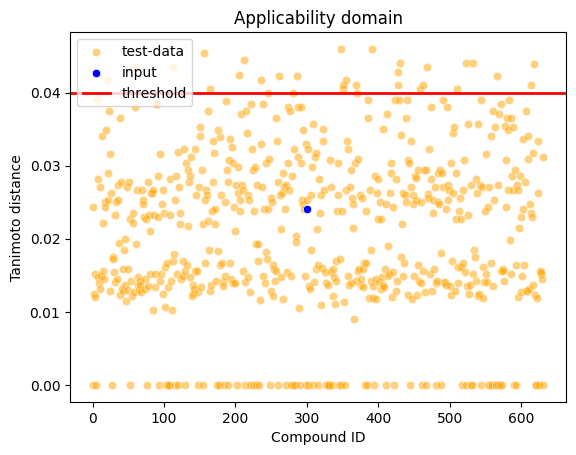

In [7]:
from AD_analysis import AD

ad = AD(smiles_train)
fig, ax = ad.plot_distance(smiles_test, threshold = 0.04, input_info='C1=C(C2=C(N=CN=C2N1C3C(C(C(O3)CO)O)O)N)C(=O)N')


In [ ]:
import pickle

with open('rfc_model.pkl', 'rb') as file:
    rfc_model = pickle.load(file)

applicability_threshold = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06]
accuracy_pred = []
y_true = []
y_pred = []

filtered_map = []

#for each value in the applicability domain (threshold)
#get accuracy value <-
        #get all smiles of compounds in the domain
                #create a map filter based on if each tanimoto distance is in threshold
                #apply filter to smiles list
                #get your desired smiles
        #calculate all pred with rfc_model of smiles
                #from smiles, compute morgan fps
                #predict each molecule with their morgan fps
                #answer is a list of bits
        #compare pred with y true and get accuracies
                #compute accuracy using TN, TP, FN, FP
                #append accuracy to accuracy_pred list
        #make the plot
                #plot a graph with threshold as the x-axis and accuracy as the y-axis
#plot accuracy against threshold values

similarities = ad.get_similarity(smiles_test)
distance = list(map(lambda p: 1-p,similarities))

for i in applicability_threshold:
    filter_map = [d for d in distance if d <= i]

In [ ]:
applicability_threshold = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045, 0.05, 0.055, 0.06]
fig = sns.scatterplot(applicability_threshold)
sns.scatterplot(y=[0.08], x=[6])

In [ ]:
fig.set_title('AD')


In [ ]:
fig, ax = plt.subplots()
ax.scatter(x=[1,2,3], y=[2,6,3])

In [ ]:
ax.scatter(3,5)
fig

In [ ]:
ax

In [ ]:
import io

sns.scatterplot(applicability_threshold)
buffer = io.BytesIO()

plt.savefig(buffer, format ='png')